# Librosa - detect bat pulses in time domain

This is an early test to check if librosa can be used to detect bat pulses and sequences in time domain. 

Bat sound is normally "sparse data" and music is "densed data". The idea here is to first check where there are 
sound peaks that differ from the background noise and after that use FFT for those parts only. 

Hop-length is set to 1 ms in the examples below. Then it's easy to handle all used sampling frequencies 
from 192 to 500 kHz by dividing by 1000.

Alternatives in librosa that might work (but I have just started to use it and there are probably many more alternatives): 

- onset-detection. (34 ms)
- rmse and localmax. (3 ms)
- onset_strength and peak_pick. (36 ms)
- peak_pick. (8 ms)

Note: When running "%%timeit" no values are stored that can be used in the following notebook cells.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 4)

In [2]:
import numpy as np
import librosa

### onset_detect

In [3]:
def test_onset_detect(y, hop_length):
    y2 = y.copy()
    rms_tot = np.sqrt(np.mean(y**2))
    y2[(np.abs(y) < (rms_tot * 1.5))] = 0.0
    onsets = librosa.onset.onset_detect(y=y2, sr=sr, hop_length=hop_length) 
    index_list = librosa.frames_to_samples(onsets, hop_length=hop_length)
    return index_list

In [4]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_onset_detect(y, 384)
print(len(index_list))
index_list

12


array([ 11904,  29568,  49152,  67200,  87168, 105216, 126720, 145152,
       162432, 178176, 196608, 214656])

In [5]:
%%timeit
index_list = test_onset_detect(y, 384)

10 loops, best of 3: 35.5 ms per loop


12


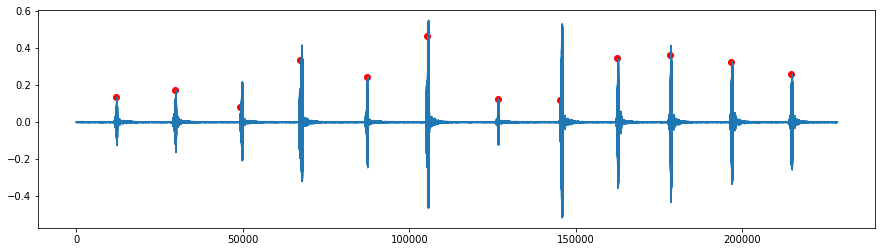

In [6]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_onset_detect(y, 384)#Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

16


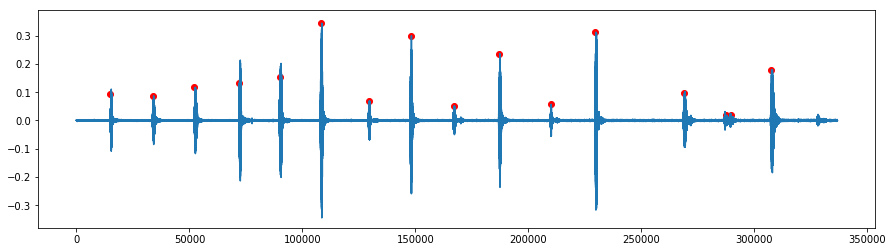

In [7]:
y, sr = librosa.load('../data_in/Ppip_TE384.wav')
index_list = test_onset_detect(y, 384)#Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

1467


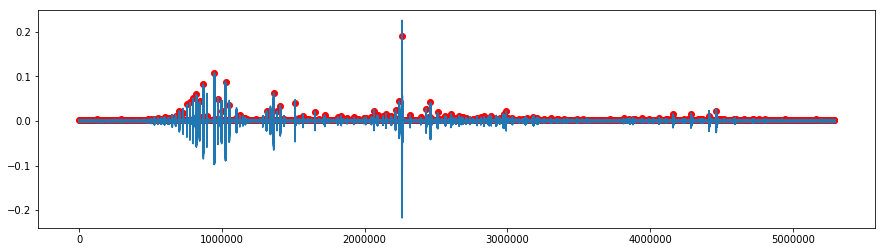

In [8]:
y, sr = librosa.load('../data_in/Myotis-Plecotus-Eptesicus_TE384.wav')
index_list = test_onset_detect(y, 384)#Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

### rmse + localmax

In [9]:
def test_rmse_localmax(y, hop_length):
    y2 = y.copy()
    rms_tot = np.sqrt(np.mean(y**2))
    y2[(np.abs(y) < (rms_tot * 1.5))] = 0.0
    rmse = librosa.feature.rmse(y=y2, hop_length=384, frame_length=1024, center=True)
    locmax = librosa.util.localmax(rmse.T)
    maxindexlist = []
    for index, a in enumerate(locmax):
        if a: maxindexlist.append(index)
    index_list = librosa.frames_to_samples(maxindexlist, hop_length=hop_length)
    return index_list

In [10]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_rmse_localmax(y, 384)
print(len(index_list))
index_list

12


array([ 11904,  29568,  49536,  67584,  87168, 105600, 126720, 145920,
       162816, 178560, 196992, 214656])

In [11]:
%%timeit
test_rmse_localmax(y, 384)

100 loops, best of 3: 3.07 ms per loop


12


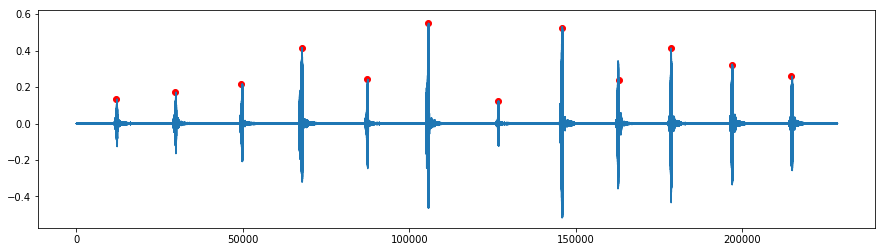

In [12]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_rmse_localmax(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

16


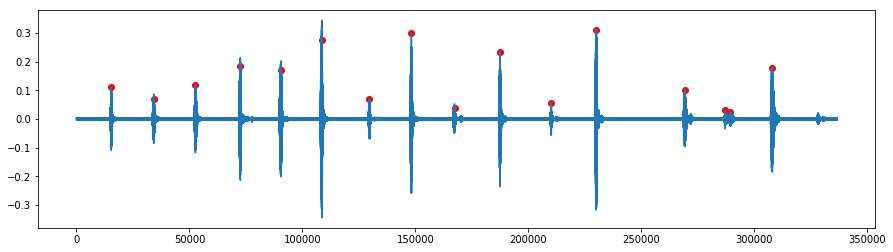

In [13]:
y, sr = librosa.load('../data_in/Ppip_TE384.wav')
index_list = test_rmse_localmax(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

1875


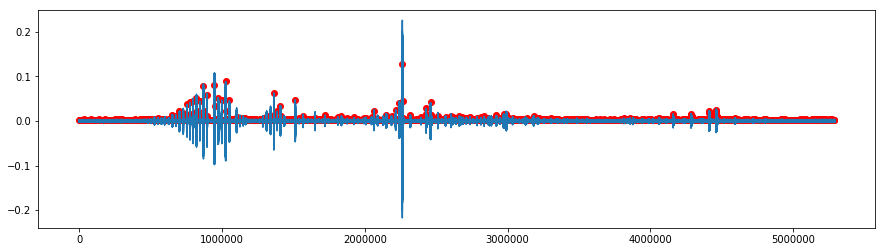

In [14]:
y, sr = librosa.load('../data_in/Myotis-Plecotus-Eptesicus_TE384.wav')
index_list = test_rmse_localmax(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

### onset_strength and peak_pick

In [15]:
def test_onset_strength_and_peak_pick(y, hop_length):
    y2 = y.copy()
    rms_tot = np.sqrt(np.mean(y**2))
    y2[(np.abs(y) < (rms_tot * 1.5))] = 0.0
    onset_env = librosa.onset.onset_strength(y=y2, sr=sr,
                                             hop_length=384,
                                             aggregate=np.median)
    peak_index_list = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 10)
    index_list = librosa.frames_to_samples(peak_index_list, hop_length=hop_length)
    return index_list

In [16]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_onset_strength_and_peak_pick(y, 384)
print(len(index_list))
index_list

12


array([ 12288,  29568,  49536,  67200,  87168, 105216, 126720, 145536,
       162432, 178560, 196608, 214656])

In [17]:
%%timeit
test_onset_strength_and_peak_pick(y, 384)

10 loops, best of 3: 35.8 ms per loop


12


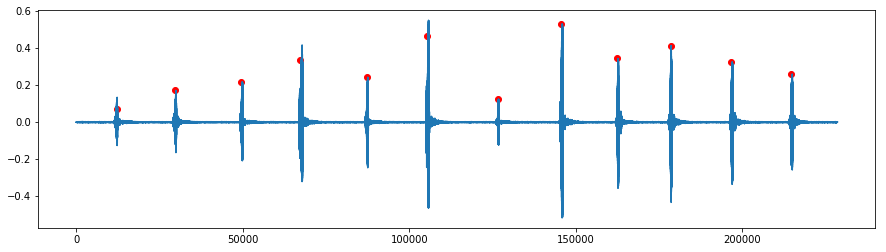

In [18]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_onset_strength_and_peak_pick(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

15


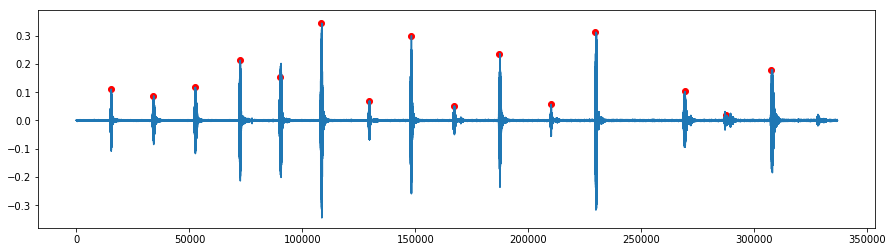

In [19]:
y, sr = librosa.load('../data_in/Ppip_TE384.wav')
index_list = test_onset_strength_and_peak_pick(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

818


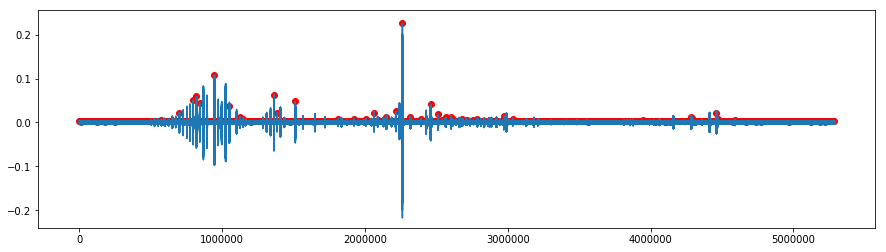

In [20]:
y, sr = librosa.load('../data_in/Myotis-Plecotus-Eptesicus_TE384.wav')
index_list = test_onset_strength_and_peak_pick(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

### peak_pick

In [21]:
def test_peak_pick(y, hop_length):
    y2 = y.copy()
    rms_tot = np.sqrt(np.mean(y**2))
    y2[(np.abs(y) < (rms_tot * 1.5))] = 0.0
    
    frames_per_ms = hop_length
    minmax_window = frames_per_ms / 4
    mean_window = frames_per_ms / 8
    sensitivity = rms_tot * 1.5 # 0.1
    skip_ms = 1

    index_list = librosa.util.peak_pick(y2, 
                                        minmax_window, minmax_window, 
                                        mean_window, mean_window, 
                                        sensitivity, 
                                        frames_per_ms * skip_ms)
    
    return index_list

In [22]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_peak_pick(y, 384)
print(len(index_list))
index_list

19


array([ 12213,  29344,  29855,  49215,  49793,  67064,  67766,  87489,
       105209, 105738, 126765, 145299, 145875, 162664, 163499, 178626,
       196958, 197725, 214978])

In [23]:
%%timeit
test_peak_pick(y, 384)

100 loops, best of 3: 8.28 ms per loop


19


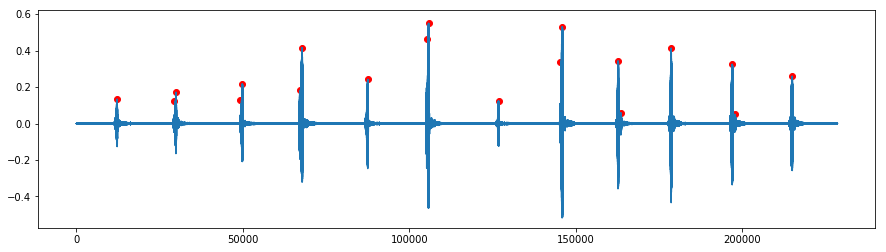

In [24]:
y, sr = librosa.load('../data_in/Mdau_TE384.wav')
index_list = test_peak_pick(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

38


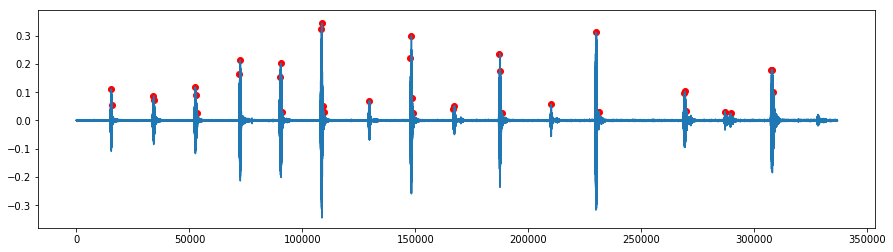

In [25]:
y, sr = librosa.load('../data_in/Ppip_TE384.wav')
index_list = test_peak_pick(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()

2135


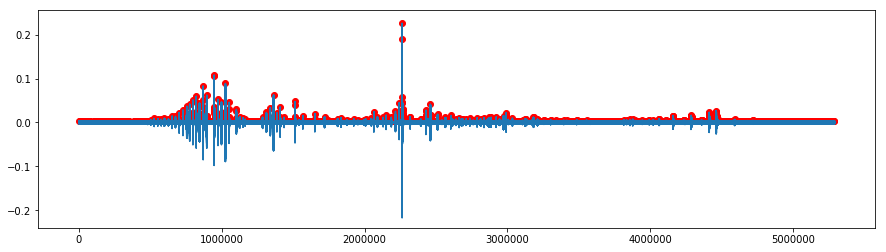

In [26]:
y, sr = librosa.load('../data_in/Myotis-Plecotus-Eptesicus_TE384.wav')
index_list = test_peak_pick(y, 384) # Compare to original signal. Red dots are peaks.
plt.plot(y)
plt.scatter(index_list, [y[x:x+400].max() for x in index_list], color='r')
print(len(index_list))
plt.show()